In [ ]:
姓名：邓乾君

In [ ]:
学号：202031763105

In [ ]:
1、导入包和数据

In [14]:
##导入依赖包
# coding=utf-8

import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from pylab import mpl
from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))    #控制输出为精确到小数点后三位
color = sns.color_palette()
sns.set_style('darkgrid')

In [15]:
data = pd.read_csv('E:/data.csv', encoding='gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5642 non-null   int64  
 1   性别           5642 non-null   object 
 2   年龄           5642 non-null   int64  
 3   体检日期         5642 non-null   object 
 4   *天门冬氨酸氨基转换酶  4421 non-null   float64
 5   *丙氨酸氨基转换酶    4421 non-null   float64
 6   *碱性磷酸酶       4421 non-null   float64
 7   *r-谷氨酰基转换酶   4421 non-null   float64
 8   *总蛋白         4421 non-null   float64
 9   白蛋白          4421 non-null   float64
 10  *球蛋白         4421 non-null   float64
 11  白球比例         4421 non-null   float64
 12  甘油三酯         4423 non-null   float64
 13  总胆固醇         4423 non-null   float64
 14  高密度脂蛋白胆固醇    4423 non-null   float64
 15  低密度脂蛋白胆固醇    4423 non-null   float64
 16  尿素           4264 non-null   float64
 17  肌酐           4264 non-null   float64
 18  尿酸           4264 non-null   float64
 19  乙肝表面抗原

In [ ]:
2、数据探索

In [16]:
data.head()#从头开始排序

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,男,41,12/10/2017,24.960,23.100,99.590,20.230,76.880,49.600,...,166.000,9.900,17.400,0.164,54.100,34.200,6.500,4.700,0.600,6.060
1,2,男,41,19/10/2017,24.570,36.250,67.210,79.000,79.430,47.760,...,277.000,9.200,10.300,0.260,52.000,36.700,5.800,4.700,0.800,5.390
2,3,男,46,26/10/2017,20.820,15.230,63.690,38.170,86.230,48.000,...,241.000,8.300,16.600,0.199,48.100,40.300,7.700,3.200,0.800,5.590
3,4,女,22,25/10/2017,14.990,10.590,74.080,20.220,70.980,44.020,...,252.000,10.300,10.800,0.260,41.700,46.500,6.700,4.600,0.500,4.300
4,5,女,48,26/10/2017,20.070,14.780,75.790,22.720,78.050,41.830,...,316.000,11.100,14.000,0.350,56.600,33.100,9.100,0.600,0.600,5.420


In [17]:
data.describe()#表格基本信息

,id,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
count,5642.000,5642.000,4421.000,4421.000,4421.000,4421.000,4421.000,4421.000,4421.000,4421.000,...,5626.000,5619.000,5619.000,5619.000,5626.000,5626.000,5626.000,5626.000,5626.000,5642.000
mean,2866.184,45.580,26.806,27.652,87.482,38.824,76.771,45.823,30.949,1.503,...,253.085,10.653,13.304,0.268,56.718,33.779,6.857,2.044,0.604,5.632
std,1655.556,12.962,13.563,22.612,25.631,40.788,4.016,2.617,3.566,0.221,...,59.587,0.985,2.174,0.061,7.800,7.253,1.568,1.711,0.292,1.545
min,1.000,3.000,10.040,0.120,22.980,6.360,57.320,29.540,7.060,0.520,...,37.000,7.100,8.000,0.042,14.400,7.500,3.100,0.000,0.000,3.070
25%,1433.250,35.000,20.250,15.130,70.370,17.810,74.190,44.130,28.570,1.360,...,213.000,10.000,11.700,0.230,51.600,28.800,5.800,0.900,0.400,4.920
50%,2870.500,45.000,23.890,21.480,84.470,26.190,76.630,45.820,30.780,1.490,...,249.000,10.600,12.900,0.260,56.700,33.600,6.700,1.600,0.600,5.290
75%,4302.750,54.000,29.270,32.300,100.210,43.850,79.530,47.570,33.180,1.630,...,289.000,11.300,14.600,0.300,62.000,38.500,7.700,2.600,0.700,5.768
max,5732.000,93.000,434.950,498.890,374.320,736.990,100.410,54.080,66.180,7.120,...,745.000,15.200,25.300,0.710,88.500,76.300,23.200,22.500,3.500,38.430


In [18]:
#编码转换:字符编码转为数字
data['性别']=data['性别'].map({'男': 1, '女': 0,"??": 0})

In [19]:
# 按体检日期分组统计样本情况
data.groupby(by='体检日期').count()

,id,性别,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
体检日期,,,,,,,,,,,,,,,,,,,,,
09/10/2017,118,118,118,109,109,109,109,109,109,109,...,118,118,118,118,118,118,118,118,118,118
10/10/2017,170,170,170,146,146,146,146,146,146,146,...,170,168,168,168,170,170,170,170,170,170
11/10/2017,159,159,159,146,146,146,146,146,146,146,...,159,159,159,159,159,159,159,159,159,159
12/10/2017,161,161,161,152,152,152,152,152,152,152,...,161,161,161,161,161,161,161,161,161,161
13/10/2017,183,183,183,162,162,162,162,162,162,162,...,183,182,182,182,183,183,183,183,183,183
15/09/2017,127,127,127,121,121,121,121,121,121,121,...,126,126,126,126,126,126,126,126,126,127
16/10/2017,118,118,118,80,80,80,80,80,80,80,...,118,118,118,118,118,118,118,118,118,118
17/10/2017,210,210,210,165,165,165,165,165,165,165,...,210,210,210,210,210,210,210,210,210,210
18/09/2017,117,117,117,103,103,103,103,103,103,103,...,115,113,113,113,115,115,115,115,115,117


In [ ]:
3、处理缺失值与异常值

The null data percentage is:
 id            0.000
性别            0.000
年龄            0.000
体检日期          0.000
*天门冬氨酸氨基转换酶   0.216
*丙氨酸氨基转换酶     0.216
*碱性磷酸酶        0.216
*r-谷氨酰基转换酶    0.216
*总蛋白          0.216
白蛋白           0.216
*球蛋白          0.216
白球比例          0.216
甘油三酯          0.216
总胆固醇          0.216
高密度脂蛋白胆固醇     0.216
低密度脂蛋白胆固醇     0.216
尿素            0.244
肌酐            0.244
尿酸            0.244
乙肝表面抗原        0.758
乙肝表面抗体        0.758
乙肝e抗原         0.758
乙肝e抗体         0.758
乙肝核心抗体        0.758
白细胞计数         0.003
红细胞计数         0.003
血红蛋白          0.003
红细胞压积         0.003
红细胞平均体积       0.003
红细胞平均血红蛋白量    0.003
红细胞平均血红蛋白浓度   0.003
红细胞体积分布宽度     0.003
血小板计数         0.003
血小板平均体积       0.004
血小板体积分布宽度     0.004
血小板比积         0.004
中性粒细胞%        0.003
淋巴细胞%         0.003
单核细胞%         0.003
嗜酸细胞%         0.003
嗜碱细胞%         0.003
血糖            0.000
dtype: float64


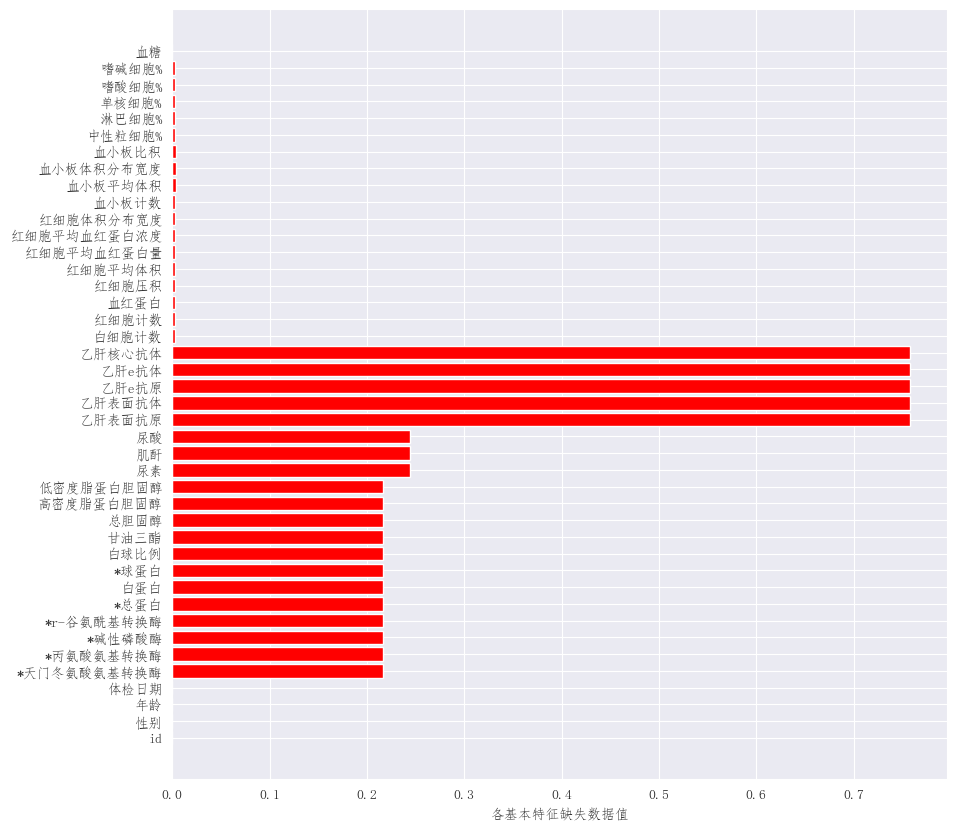

In [20]:
#数据集各特征缺失情况及图形化显示
null_percentage = data.isnull().sum()/len(data)

print ('The null data percentage is:\n',null_percentage)

mpl.rcParams['font.sans-serif'] = ['FangSong']

null_percentage = null_percentage.reset_index()

null_percentage.columns = ['column_name','column_value']

ind = np.arange(null_percentage.shape[0])
fig , ax = plt.subplots(figsize = (10, 10))
rects = ax.barh(ind,null_percentage.column_value.values,color='red')
ax.set_yticks(ind)
ax.set_yticklabels(null_percentage.column_name.values,rotation='horizontal')
ax.set_xlabel("各基本特征缺失数据值")
plt.show()

35    193
45    187
54    185
49    173
36    163
     ... 
87      1
6       1
93      1
20      1
15      1
Name: 年龄, Length: 76, dtype: int64


<AxesSubplot:xlabel='年龄', ylabel='count'>

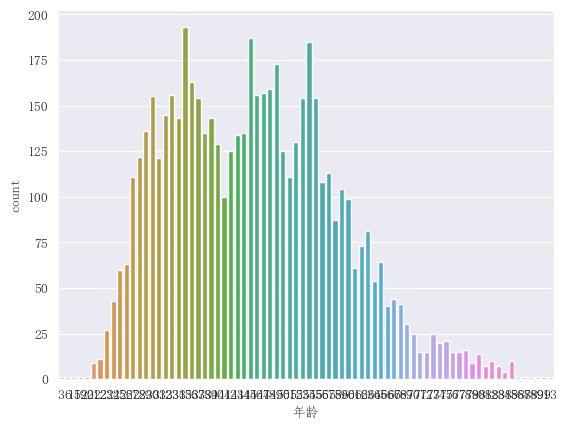

In [21]:
# 查看标签分布，可以考虑将年龄划分为不同的段
print(data['年龄'].value_counts())
# 使用柱状图的方式画出标签个数统计
sns.countplot(data['年龄'],label="Count")

In [25]:
#相关系数矩阵
#负数为负相关，正数为正相关
from __future__ import print_function
import pandas as pd
data = 'E:\data.xlsx'
Data = pd.read_excel(data,index_col = u'年龄')

Data.corr()

,id,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,甘油三酯,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
id,1.000,-0.001,-0.036,-0.014,-0.027,-0.047,-0.036,-0.027,0.007,0.011,...,-0.028,-0.011,-0.019,-0.035,-0.000,-0.002,-0.002,0.011,-0.007,0.046
*天门冬氨酸氨基转换酶,-0.001,1.000,0.836,0.180,0.402,0.094,0.060,0.061,-0.010,0.146,...,-0.073,0.007,0.023,-0.075,-0.067,0.031,0.120,0.052,0.073,0.100
*丙氨酸氨基转换酶,-0.036,0.836,1.000,0.180,0.457,0.092,0.167,-0.019,0.080,0.188,...,-0.020,-0.012,0.026,-0.027,-0.053,0.018,0.092,0.076,0.064,0.132
*碱性磷酸酶,-0.014,0.180,0.180,1.000,0.235,0.122,0.002,0.137,-0.086,0.135,...,0.050,-0.012,-0.009,0.050,0.009,-0.008,-0.017,0.006,0.023,0.153
*r-谷氨酰基转换酶,-0.027,0.402,0.457,0.235,1.000,0.069,0.121,-0.012,0.068,0.297,...,-0.011,-0.016,0.022,-0.016,-0.042,0.011,0.070,0.065,0.088,0.126
*总蛋白,-0.047,0.094,0.092,0.122,0.069,1.000,0.488,0.768,-0.421,0.019,...,0.131,0.021,-0.003,0.144,-0.026,0.037,-0.005,-0.037,-0.001,0.045
白蛋白,-0.036,0.060,0.167,0.002,0.121,0.488,1.000,-0.184,0.527,0.097,...,-0.004,0.031,0.043,0.006,-0.021,0.033,-0.032,-0.018,0.004,0.003
*球蛋白,-0.027,0.061,-0.019,0.137,-0.012,0.768,-0.184,1.000,-0.862,-0.050,...,0.151,0.001,-0.035,0.158,-0.014,0.018,0.018,-0.029,-0.004,0.049
白球比例,0.007,-0.010,0.080,-0.086,0.068,-0.421,0.527,-0.862,1.000,0.164,...,-0.125,0.023,0.056,-0.123,-0.011,0.010,-0.016,0.019,0.010,-0.014
甘油三酯,0.011,0.146,0.188,0.135,0.297,0.019,0.097,-0.050,0.164,1.000,...,0.008,0.017,0.046,0.017,-0.021,0.018,-0.024,0.035,0.032,0.255


In [27]:
from __future__ import print_function
import pandas as pd
data = 'E:\data.xlsx'
Data = pd.read_excel(data,index_col = u'性别')

Data.corr()

,id,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
id,1.000,0.085,-0.001,-0.036,-0.014,-0.027,-0.047,-0.036,-0.027,0.007,...,-0.028,-0.011,-0.019,-0.035,-0.000,-0.002,-0.002,0.011,-0.007,0.046
年龄,0.085,1.000,0.062,-0.075,0.190,-0.003,-0.061,-0.319,0.165,-0.246,...,-0.174,0.017,-0.025,-0.173,0.018,-0.035,0.052,0.016,0.033,0.253
*天门冬氨酸氨基转换酶,-0.001,0.062,1.000,0.836,0.180,0.402,0.094,0.060,0.061,-0.010,...,-0.073,0.007,0.023,-0.075,-0.067,0.031,0.120,0.052,0.073,0.100
*丙氨酸氨基转换酶,-0.036,-0.075,0.836,1.000,0.180,0.457,0.092,0.167,-0.019,0.080,...,-0.020,-0.012,0.026,-0.027,-0.053,0.018,0.092,0.076,0.064,0.132
*碱性磷酸酶,-0.014,0.190,0.180,0.180,1.000,0.235,0.122,0.002,0.137,-0.086,...,0.050,-0.012,-0.009,0.050,0.009,-0.008,-0.017,0.006,0.023,0.153
*r-谷氨酰基转换酶,-0.027,-0.003,0.402,0.457,0.235,1.000,0.069,0.121,-0.012,0.068,...,-0.011,-0.016,0.022,-0.016,-0.042,0.011,0.070,0.065,0.088,0.126
*总蛋白,-0.047,-0.061,0.094,0.092,0.122,0.069,1.000,0.488,0.768,-0.421,...,0.131,0.021,-0.003,0.144,-0.026,0.037,-0.005,-0.037,-0.001,0.045
白蛋白,-0.036,-0.319,0.060,0.167,0.002,0.121,0.488,1.000,-0.184,0.527,...,-0.004,0.031,0.043,0.006,-0.021,0.033,-0.032,-0.018,0.004,0.003
*球蛋白,-0.027,0.165,0.061,-0.019,0.137,-0.012,0.768,-0.184,1.000,-0.862,...,0.151,0.001,-0.035,0.158,-0.014,0.018,0.018,-0.029,-0.004,0.049
白球比例,0.007,-0.246,-0.010,0.080,-0.086,0.068,-0.421,0.527,-0.862,1.000,...,-0.125,0.023,0.056,-0.123,-0.011,0.010,-0.016,0.019,0.010,-0.014


In [28]:
#剔除id（标识），体检日期
#pandas中常用的drop方法
DATA1 = Data.drop(labels=['id','体检日期'],axis=1)
DATA1.head()

,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,甘油三酯,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
性别,,,,,,,,,,,,,,,,,,,,,
男,41,24.960,23.100,99.590,20.230,76.880,49.600,27.280,1.820,1.310,...,166.000,9.900,17.400,0.164,54.100,34.200,6.500,4.700,0.600,6.060
男,41,24.570,36.250,67.210,79.000,79.430,47.760,31.670,1.510,2.810,...,277.000,9.200,10.300,0.260,52.000,36.700,5.800,4.700,0.800,5.390
男,46,20.820,15.230,63.690,38.170,86.230,48.000,38.230,1.260,0.990,...,241.000,8.300,16.600,0.199,48.100,40.300,7.700,3.200,0.800,5.590
女,22,14.990,10.590,74.080,20.220,70.980,44.020,26.960,1.630,1.060,...,252.000,10.300,10.800,0.260,41.700,46.500,6.700,4.600,0.500,4.300
女,48,20.070,14.780,75.790,22.720,78.050,41.830,36.220,1.150,0.970,...,316.000,11.100,14.000,0.350,56.600,33.100,9.100,0.600,0.600,5.420


In [29]:
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'

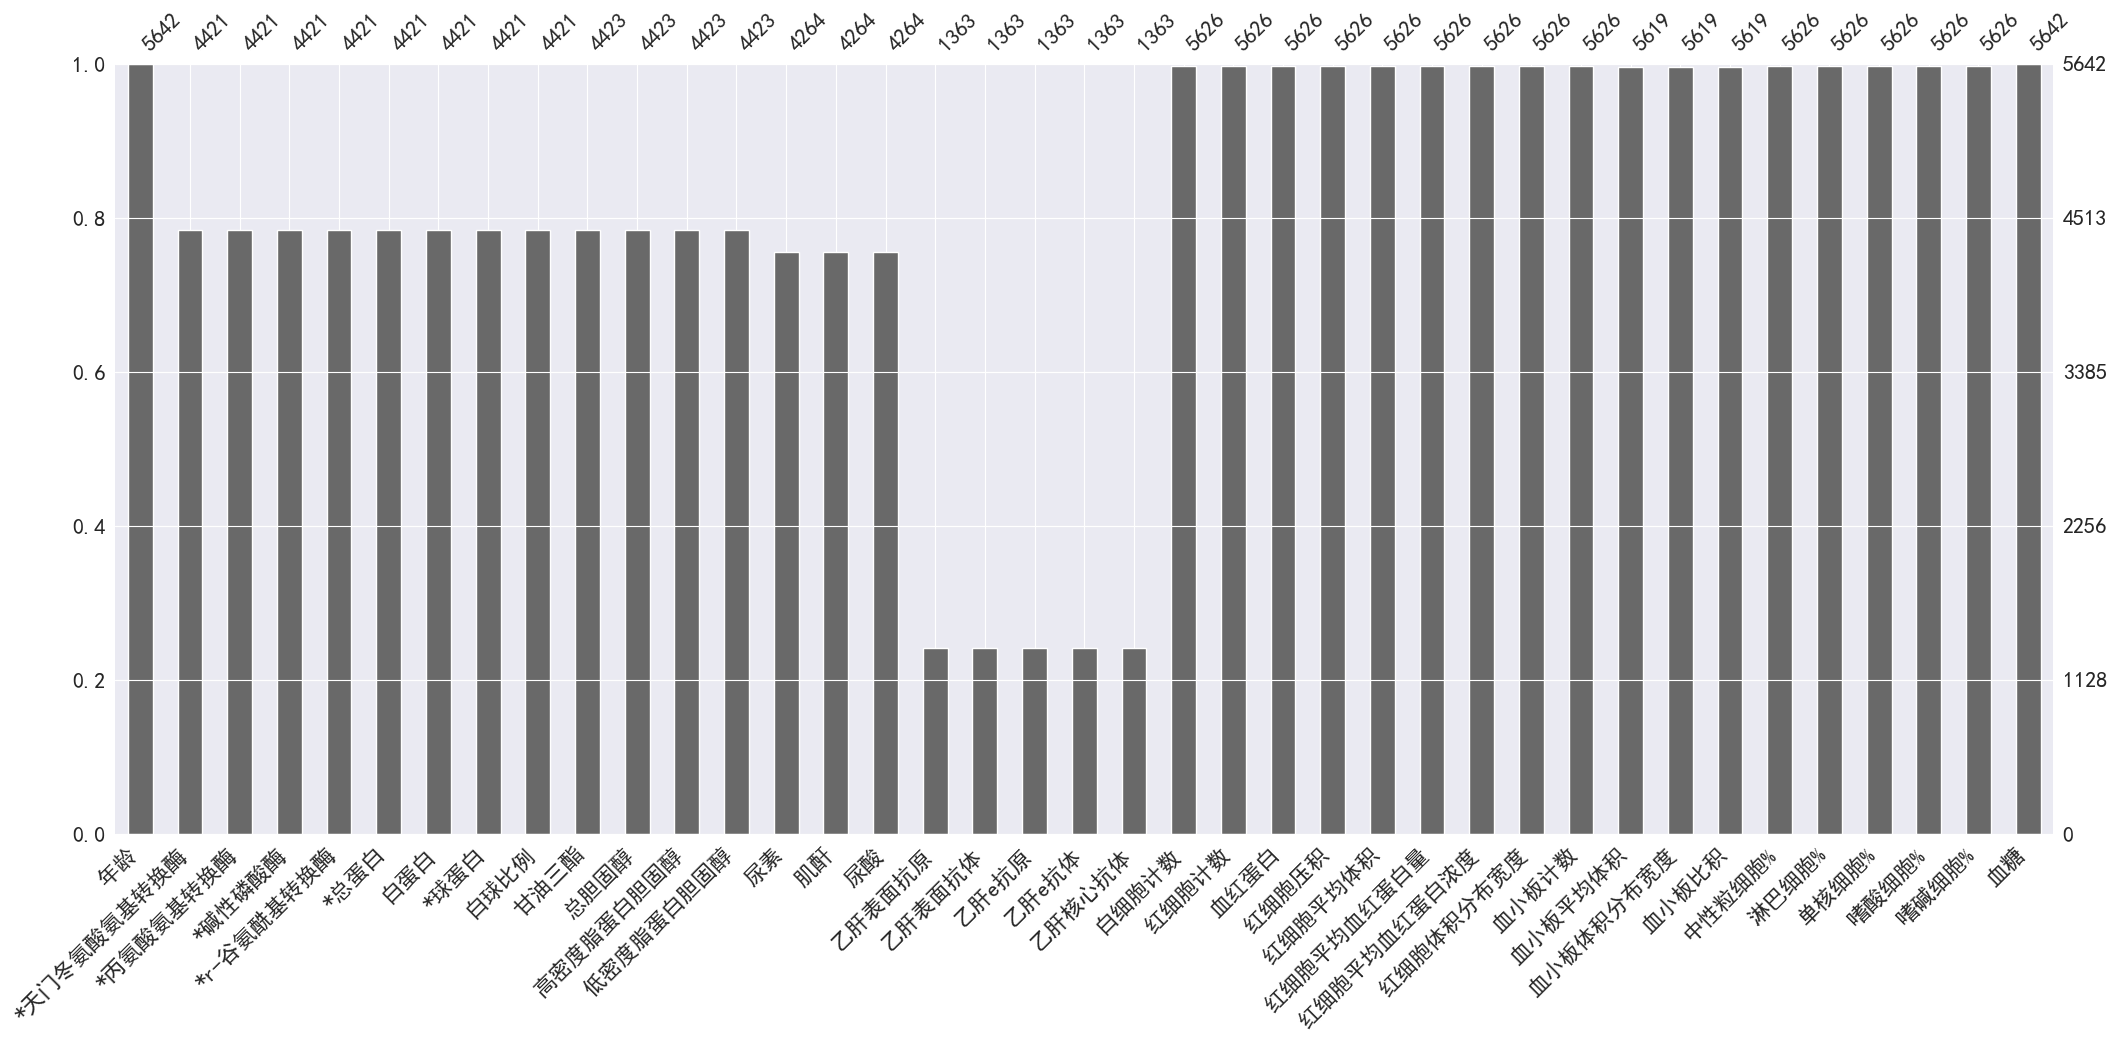

In [30]:
#数据缺失情况可视化
import missingno as msno
p = msno.bar(DATA1)#高度越低说明缺失值越多，
#左侧纵坐标为数据非缺失值所占的百分比，右侧纵坐标为数据非缺失值的数量


In [31]:
#设定阈值
thresh_count = DATA1.shape[0]*0.7#删掉缺失值超过百分之三十的数据

In [32]:
#超过30%就删掉
Data1 = DATA1.dropna(thresh=thresh_count, axis=1)

<AxesSubplot:>

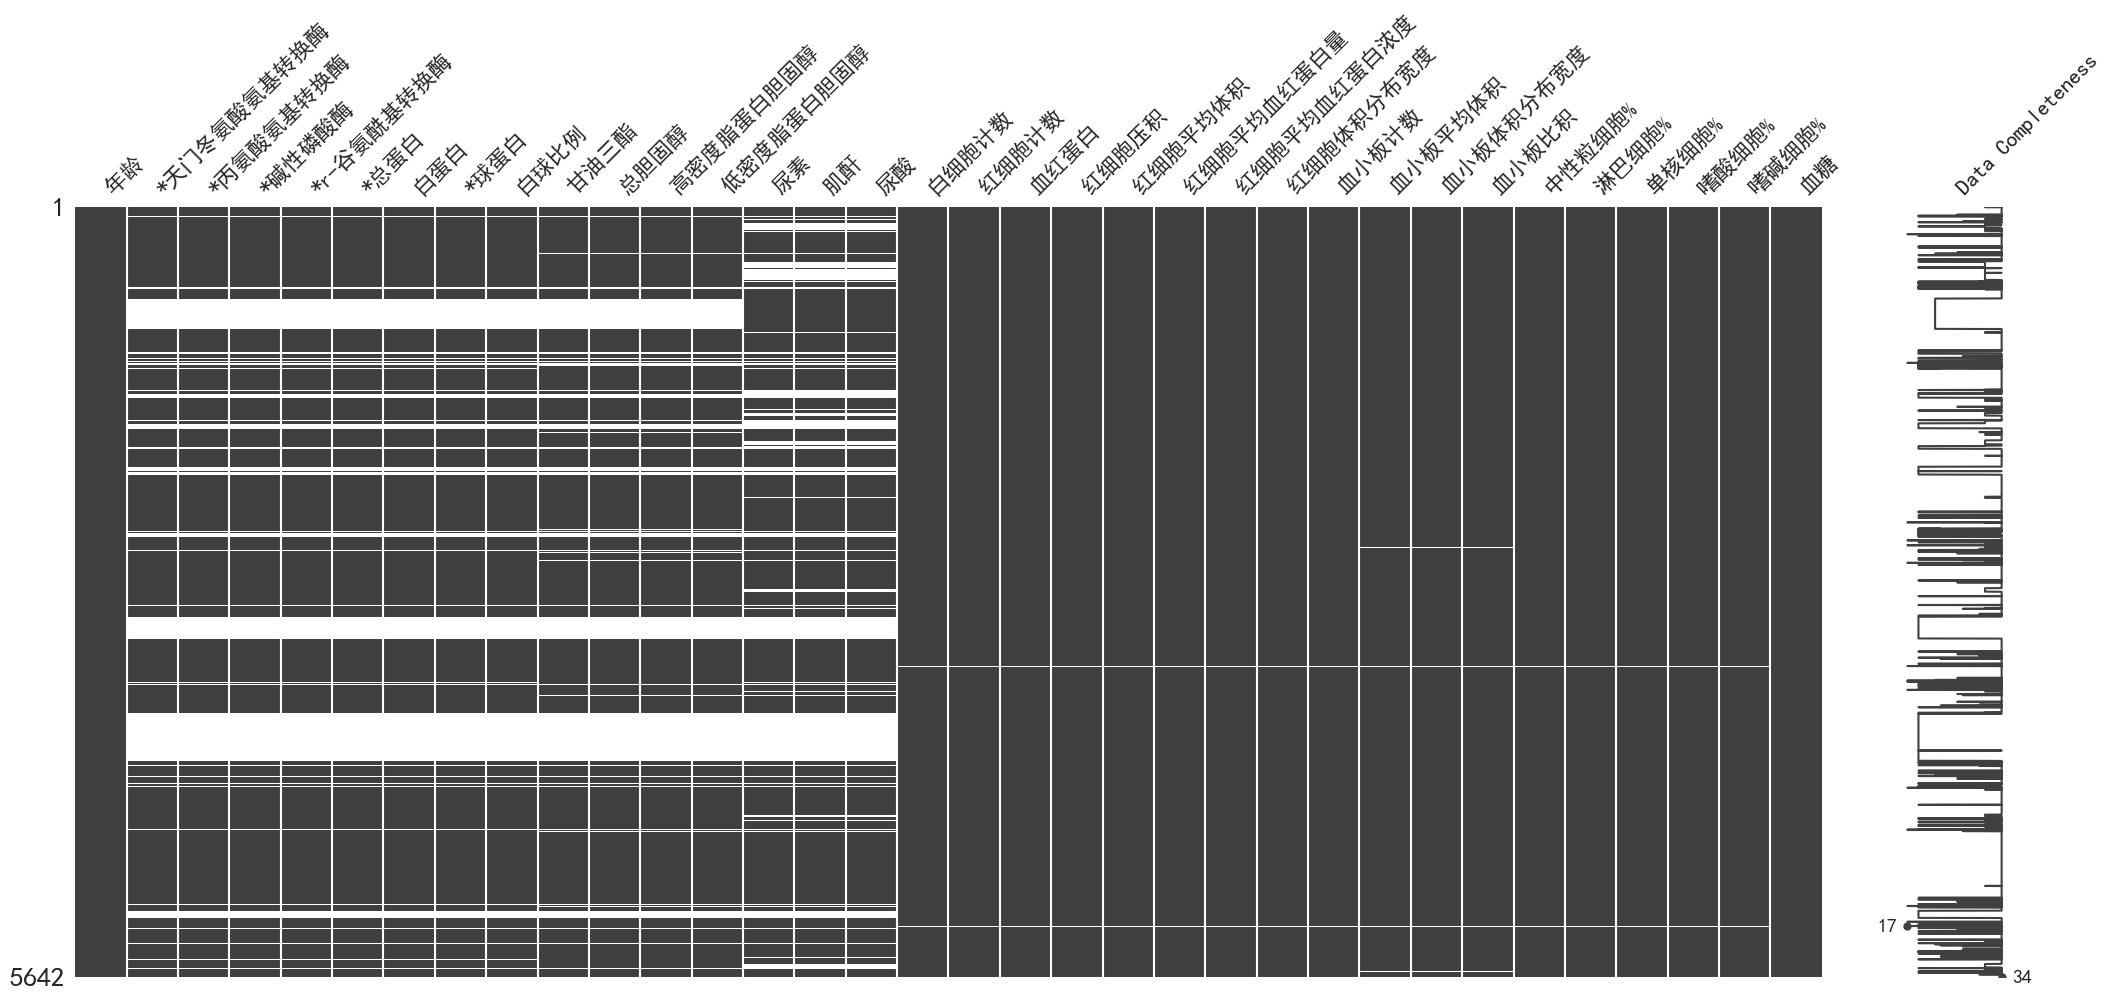

In [33]:
#可视化
p=msno.matrix(Data1, labels=True)# 无效数据密度显示（图中白线越多，则说明缺失值越多）
p
#左侧纵坐标上的两个数值为样本数量的始末（即从 1 开始数有 5642 条数据）
#右下角数字 30表示数据中共有 30 列不存在缺失值
#右侧数字 34表示数据共计 34 列。

In [34]:
#使用均值填充
Data1 = Data1.fillna(Data1.mean())
Data1.isnull().mean()

年龄            0.000
*天门冬氨酸氨基转换酶   0.000
*丙氨酸氨基转换酶     0.000
*碱性磷酸酶        0.000
*r-谷氨酰基转换酶    0.000
*总蛋白          0.000
白蛋白           0.000
*球蛋白          0.000
白球比例          0.000
甘油三酯          0.000
总胆固醇          0.000
高密度脂蛋白胆固醇     0.000
低密度脂蛋白胆固醇     0.000
尿素            0.000
肌酐            0.000
尿酸            0.000
白细胞计数         0.000
红细胞计数         0.000
血红蛋白          0.000
红细胞压积         0.000
红细胞平均体积       0.000
红细胞平均血红蛋白量    0.000
红细胞平均血红蛋白浓度   0.000
红细胞体积分布宽度     0.000
血小板计数         0.000
血小板平均体积       0.000
血小板体积分布宽度     0.000
血小板比积         0.000
中性粒细胞%        0.000
淋巴细胞%         0.000
单核细胞%         0.000
嗜酸细胞%         0.000
嗜碱细胞%         0.000
血糖            0.000
dtype: float64

In [35]:
#用Min-Max方法进行数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Data1)
X_s = scaler.transform(Data1)
Data1=pd.DataFrame(X_s,columns=Data1.columns)
print(Data1)

        年龄  *天门冬氨酸氨基转换酶  *丙氨酸氨基转换酶  *碱性磷酸酶  *r-谷氨酰基转换酶  *总蛋白   白蛋白  *球蛋白  \
0    0.422        0.035      0.046   0.218       0.019 0.454 0.817 0.342   
1    0.422        0.034      0.072   0.126       0.099 0.513 0.742 0.416   
2    0.478        0.025      0.030   0.116       0.044 0.671 0.752 0.527   
3    0.211        0.012      0.021   0.145       0.019 0.317 0.590 0.337   
4    0.500        0.024      0.029   0.150       0.022 0.481 0.501 0.493   
...    ...          ...        ...     ...         ...   ...   ...   ...   
5637 0.489        0.021      0.029   0.088       0.011 0.467 0.600 0.442   
5638 0.311        0.026      0.026   0.151       0.010 0.543 0.720 0.447   
5639 0.856        0.030      0.043   0.237       0.036 0.417 0.444 0.470   
5640 0.578        0.055      0.050   0.212       0.018 0.492 0.553 0.479   
5641 0.300        0.027      0.041   0.084       0.028 0.523 0.803 0.398   

      白球比例  甘油三酯  ...  血小板计数  血小板平均体积  血小板体积分布宽度  血小板比积  中性粒细胞%  淋巴细胞%  单核细胞%  \
0    0

In [36]:
#异常值修正
# '*天门冬氨酸氨基转换酶','白蛋白','白球比例','甘油三酯',
#            '总胆固醇','血小板计数','血小板平均体积','血小板体积分布宽度',
#            '血小板比积','中性粒细胞%','血小板平均体积','淋巴细胞%','单核细胞%'
print(Data1.shape)
# Data1.drop(Data1[(Data1['年龄']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['*天门冬氨酸氨基转换酶']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['白蛋白']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['白球比例']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['*r-谷氨酰基转换酶']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['甘油三酯']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['总胆固醇']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['血小板计数']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['血小板平均体积']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['血小板体积分布宽度']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['血小板比积']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['中性粒细胞%']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['血小板平均体积']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['淋巴细胞%']==0)].index, inplace=True)
Data1.drop(Data1[(Data1['单核细胞%']==0)].index, inplace=True)
print(Data1.shape)
print(Data1.describe())

(5642, 34)
(5628, 34)
            年龄  *天门冬氨酸氨基转换酶  *丙氨酸氨基转换酶   *碱性磷酸酶  *r-谷氨酰基转换酶     *总蛋白      白蛋白  \
count 5628.000     5628.000   5628.000 5628.000    5628.000 5628.000 5628.000   
mean     0.473        0.039      0.055    0.184       0.044    0.451    0.664   
std      0.144        0.028      0.040    0.065       0.049    0.082    0.094   
min      0.000        0.004      0.000    0.000       0.000    0.000    0.097   
25%      0.356        0.026      0.033    0.147       0.018    0.408    0.615   
50%      0.467        0.039      0.053    0.184       0.038    0.451    0.664   
75%      0.567        0.041      0.057    0.205       0.044    0.493    0.714   
max      1.000        1.000      1.000    1.000       1.000    0.834    1.000   

          *球蛋白     白球比例     甘油三酯  ...    血小板计数  血小板平均体积  血小板体积分布宽度    血小板比积  \
count 5628.000 5628.000 5628.000  ... 5628.000 5628.000   5628.000 5628.000   
mean     0.404    0.149    0.038  ...    0.305    0.439      0.307    0.338   
std      0.

In [37]:
Data1.describe()

,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,甘油三酯,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
count,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,...,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000
mean,0.473,0.039,0.055,0.184,0.044,0.451,0.664,0.404,0.149,0.038,...,0.305,0.439,0.307,0.338,0.571,0.382,0.187,0.091,0.172,0.072
std,0.144,0.028,0.040,0.065,0.049,0.082,0.094,0.053,0.029,0.038,...,0.084,0.121,0.125,0.090,0.105,0.105,0.078,0.076,0.083,0.044
min,0.000,0.004,0.000,0.000,0.000,0.000,0.097,0.000,0.024,0.001,...,0.013,0.012,0.023,0.027,0.090,0.031,0.005,0.000,0.000,0.000
25%,0.356,0.026,0.033,0.147,0.018,0.408,0.615,0.375,0.133,0.020,...,0.249,0.358,0.214,0.281,0.502,0.310,0.134,0.044,0.114,0.052
50%,0.467,0.039,0.053,0.184,0.038,0.451,0.664,0.404,0.149,0.037,...,0.299,0.432,0.283,0.326,0.571,0.379,0.179,0.071,0.171,0.063
75%,0.567,0.041,0.057,0.205,0.044,0.493,0.714,0.429,0.161,0.040,...,0.356,0.519,0.382,0.386,0.641,0.451,0.229,0.116,0.200,0.076
max,1.000,1.000,1.000,1.000,1.000,0.834,1.000,0.718,1.000,1.000,...,1.000,1.000,1.000,1.000,0.946,0.961,1.000,1.000,1.000,1.000


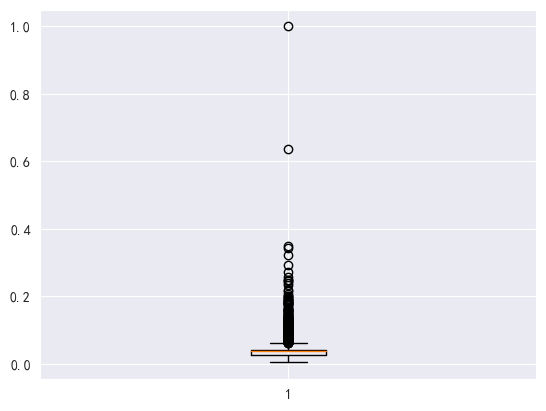

In [38]:
import matplotlib.pyplot as plt
plt.boxplot(x=Data1['*天门冬氨酸氨基转换酶'])
plt.show()

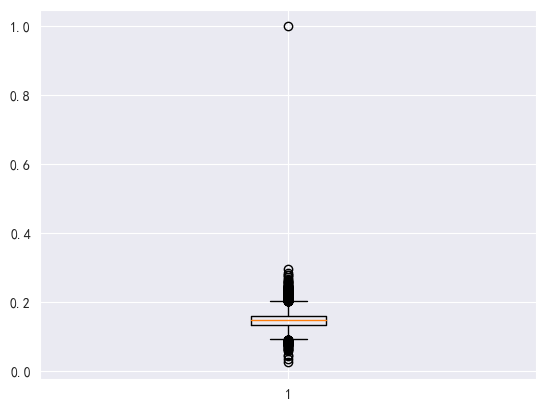

In [39]:
import matplotlib.pyplot as plt
plt.boxplot(x=Data1['白球比例'])
plt.show()

In [40]:
##提取目标项 （没有全部处理，将处理了和未处理的一起用了）
import pandas as pd
# df = pd.DataFrame()
df= Data1[['*天门冬氨酸氨基转换酶','血糖','白蛋白','白球比例','甘油三酯',
           '总胆固醇','血小板计数','血小板平均体积','血小板体积分布宽度',
           '血小板比积','中性粒细胞%','血小板平均体积','淋巴细胞%','单核细胞%']]


In [41]:
df.describe()

,*天门冬氨酸氨基转换酶,血糖,白蛋白,白球比例,甘油三酯,总胆固醇,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,血小板平均体积,淋巴细胞%,单核细胞%
count,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000,5628.000
mean,0.039,0.072,0.664,0.149,0.038,0.182,0.305,0.439,0.307,0.338,0.571,0.439,0.382,0.187
std,0.028,0.044,0.094,0.029,0.038,0.049,0.084,0.121,0.125,0.090,0.105,0.121,0.105,0.078
min,0.004,0.000,0.097,0.024,0.001,0.023,0.013,0.012,0.023,0.027,0.090,0.012,0.031,0.005
25%,0.026,0.052,0.615,0.133,0.020,0.155,0.249,0.358,0.214,0.281,0.502,0.358,0.310,0.134
50%,0.039,0.063,0.664,0.149,0.037,0.182,0.299,0.432,0.283,0.326,0.571,0.432,0.379,0.179
75%,0.041,0.076,0.714,0.161,0.040,0.202,0.356,0.519,0.382,0.386,0.641,0.519,0.451,0.229
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.946,1.000,0.961,1.000


In [42]:
#把数据分为特征x和标签y
#因为是血糖预测，所以选了血糖
x = df.drop("血糖",axis = 1)
feature_names=x.columns
print(feature_names)
y = df.血糖
part_data=df.drop("血糖",axis=1)
data_y = df.血糖
print(x,y)

Index(['*天门冬氨酸氨基转换酶', '白蛋白', '白球比例', '甘油三酯', '总胆固醇', '血小板计数', '血小板平均体积',
       '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '血小板平均体积', '淋巴细胞%', '单核细胞%'],
      dtype='object')
      *天门冬氨酸氨基转换酶   白蛋白  白球比例  甘油三酯  总胆固醇  血小板计数  血小板平均体积  血小板体积分布宽度  血小板比积  \
0           0.035 0.817 0.197 0.025 0.139  0.182    0.346      0.543  0.183   
1           0.034 0.742 0.150 0.062 0.119  0.339    0.259      0.133  0.326   
2           0.025 0.752 0.112 0.017 0.123  0.288    0.148      0.497  0.235   
3           0.012 0.590 0.168 0.019 0.271  0.304    0.395      0.162  0.326   
4           0.024 0.501 0.095 0.017 0.189  0.394    0.494      0.347  0.461   
...           ...   ...   ...   ...   ...    ...      ...        ...    ...   
5637        0.021 0.600 0.123 0.039 0.219  0.230    0.432      0.231  0.251   
5638        0.026 0.720 0.135 0.019 0.153  0.244    0.494      0.329  0.281   
5639        0.030 0.444 0.097 0.025 0.229  0.404    0.407      0.266  0.446   
5640        0.055 0.553 0.106 0.024 0.171  0.2

In [43]:
#特征选择-回归
#特征选择-回归
from sklearn.feature_selection import mutual_info_regression
mutual_info_np = mutual_info_regression(part_data,data_y)
mutual_info_series = pd.Series(mutual_info_np, index=part_data.columns)
s1=sum(mutual_info_series)
print(s1)
print(mutual_info_series)
feature_v1 = mutual_info_series/s1
print(feature_v1)

0.08067310534639471
*天门冬氨酸氨基转换酶   0.021
白蛋白           0.013
白球比例          0.000
甘油三酯          0.025
总胆固醇          0.005
血小板计数         0.000
血小板平均体积       0.000
血小板体积分布宽度     0.000
血小板比积         0.017
中性粒细胞%        0.000
血小板平均体积       0.001
淋巴细胞%         0.000
单核细胞%         0.000
dtype: float64
*天门冬氨酸氨基转换酶   0.259
白蛋白           0.158
白球比例          0.000
甘油三酯          0.304
总胆固醇          0.060
血小板计数         0.000
血小板平均体积       0.000
血小板体积分布宽度     0.000
血小板比积         0.208
中性粒细胞%        0.000
血小板平均体积       0.006
淋巴细胞%         0.004
单核细胞%         0.000
dtype: float64


In [44]:
##单因素分析，相关程度
data_x=part_data.values
corr_values = []
for i in range(data_x.shape[1]):
    corr_values.append(abs(np.corrcoef(data_x[:,i], data_y)[0, 1]))
corr_series = pd.Series(corr_values, index=part_data.columns)
s=sum(corr_series)
print(s)
print(corr_series)
feature_v2=corr_series/s
print(feature_v2)

0.8000902488306917
*天门冬氨酸氨基转换酶   0.088
白蛋白           0.003
白球比例          0.012
甘油三酯          0.228
总胆固醇          0.145
血小板计数         0.072
血小板平均体积       0.021
血小板体积分布宽度     0.040
血小板比积         0.065
中性粒细胞%        0.047
血小板平均体积       0.021
淋巴细胞%         0.052
单核细胞%         0.004
dtype: float64
*天门冬氨酸氨基转换酶   0.110
白蛋白           0.004
白球比例          0.015
甘油三酯          0.285
总胆固醇          0.182
血小板计数         0.090
血小板平均体积       0.027
血小板体积分布宽度     0.050
血小板比积         0.081
中性粒细胞%        0.058
血小板平均体积       0.027
淋巴细胞%         0.066
单核细胞%         0.005
dtype: float64


In [45]:
#提取两种方法平均影响大的变量来构建特征工程
feature_values = []
feature_values=(feature_v1+feature_v2)/2
print(feature_values)

*天门冬氨酸氨基转换酶   0.185
白蛋白           0.081
白球比例          0.008
甘油三酯          0.295
总胆固醇          0.121
血小板计数         0.045
血小板平均体积       0.013
血小板体积分布宽度     0.025
血小板比积         0.144
中性粒细胞%        0.029
血小板平均体积       0.017
淋巴细胞%         0.035
单核细胞%         0.003
dtype: float64


In [46]:
#提取满足条件的特征构建特征工程
tz = part_data.loc[:,feature_values > 0.01]
importances=tz.columns
print(importances)

Index(['*天门冬氨酸氨基转换酶', '白蛋白', '甘油三酯', '总胆固醇', '血小板计数', '血小板平均体积', '血小板体积分布宽度',
       '血小板比积', '中性粒细胞%', '血小板平均体积', '淋巴细胞%'],
      dtype='object')


In [47]:
#数据归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 训练标准化对象tz
scaler.fit(tz)  
# transform()数据标准化
tz= scaler.transform(tz)   
print(tz)

[[-0.15366197  1.63968309 -0.34056133 ... -0.33700514 -0.77102985
   0.05789386]
 [-0.18631192  0.83989332  0.61022142 ... -0.60811227 -1.48562469
   0.40471821]
 [-0.50025371  0.94421372 -0.54339498 ... -1.11159694 -2.40438949
   0.90414526]
 ...
 [-0.32193477 -2.34622575 -0.34689988 ...  0.5666853  -0.26060496
  -0.51089806]
 [ 0.56463686 -1.18566123 -0.37225409 ... -0.22081637  1.57692465
   0.43246415]
 [-0.45420892  1.48754917  0.13483004 ...  0.23102885 -0.77102985
  -0.35829535]]


In [48]:
#划分数据集
#留出法（训练 测试）
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #导入支持向量机分类算法
from sklearn.metrics import accuracy_score


data = datasets.load_iris() #导入数据集

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #对数据集进行划分


print(X_train.shape)#训练集
print(X_test.shape)#测试集

(3939, 13)
(1689, 13)


In [49]:
#利用回归方法进行建模
#用的最简单的线性回归模型
from sklearn.linear_model import LinearRegression 

model = LinearRegression()   #创建模型

model.fit(x, y)  #使用自变量和因变量对模型进行训练

X=model.score(x, y) #使用自变量和因变量对模型进行评分

Y=model.predict(X_test)  #输入参数进行预测

print(X)#拟合度
print(Y)#预测值
print('K\n',model.coef_)
print('B\n',model.intercept_)

0.07297360449495549
[0.07192568 0.07554228 0.05789732 ... 0.06466487 0.07226919 0.07626304]
K
 [ 7.06911426e-02  5.25201718e-03 -9.28752713e-02  2.31487879e-01
  7.51511495e-02 -7.93379124e-02 -5.79556436e-03  9.88992329e-04
  2.94861205e-02  3.76445123e-04 -5.79556436e-03 -2.70057264e-02
 -1.85490053e-04]
B
 0.08668352972135521


In [50]:
##采用统一的评价标准检验 mse
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, Y)#均方误差
#均方误差指的就是模型预测值 f(x) 与样本真实值 y 之间距离平方的平均值
print('MSE:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,Y)) # 均方根误差
print('RMSE:', RMSE)

MSE: 0.002108903576897173
RMSE: 0.045922800185715734
